### Final Project

1. orientation
2. velocity

set body length to 1 unit, pool size about 1000x body size?

Notemigonus crysoleucas (golden shiner) and Gambusia holbrooki (mosquitofish)
cap the max velocity at like 50 cm/s so like 10 bodylength per seconds

visual latency is in the order of 10ms

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random as rng
from matplotlib import colors

Initialization

In [67]:
N = 2 #number of fish
poolsize = 30 #relative to body length, maybe 1000
maxvelocity = 10 #bodylength per seconds

#init coordinations
motcoords = [(rng.randint(0,poolsize),rng.randint(0,poolsize)) for i in np.arange(N)]
xcoords, ycoords = zip(*motcoords)

#init orientations
motangles = [rng.randint(0,360) for i in np.arange(N)]
radmotangles = np.deg2rad(motangles)

#initialize velocity magnitude array
motvelmag = np.zeros(N)

#create a velocity (direction & magnitude) array
motvel = [(motvelmag[i]*np.cos(radmotangles[i]),motvelmag[i]*np.sin(radmotangles[i])) for i in np.arange(N)]
radmotangles

array([5.88175958, 0.87266463])

Rule setting

In [85]:
#get distance to each neighbor
def finddistances(myindex, mycoord, coordarray):
    distances = [np.linalg.norm(np.subtract(mycoord, coordarray[i])) if i != myindex else np.nan for i in np.arange(len(coordarray))]
    return distances

#first find and index nearest neighbor
testcoord = (0,0)
coords = [(0,0), (1,0), (2,0), (0,3), (-4,3)]

def findnearestneighbor(myindex, mycoord, coordarray):
    dist = finddistances(myindex, mycoord, coordarray)
    neighbor_index = np.nanargmin(dist)
    return neighbor_index, dist

def findangletoneighbor(myorientation, mycoord, neighborcoord):
    correctionfornow = myorientation + np.pi/2
    myangle = correctionfornow #in radians
    myvector = (np.cos(myangle),np.sin(myangle))
    #get vector from me to you and normalize it
    vector_from_me_to_you = np.subtract(neighborcoord,mycoord)/np.linalg.norm(np.subtract(neighborcoord,mycoord))
    dotproduct = np.dot(myvector, vector_from_me_to_you) 
    crossproduct = np.cross(myvector, vector_from_me_to_you)
    theta = -np.arctan(vector_from_me_to_you[1]/vector_from_me_to_you[0]) 
    return dotproduct, crossproduct

Test

In [87]:
# #test
# fig, ax = plt.subplots()
# #scaling follows s = 125000/x^2 where x is the width of the coordinate

# for i in np.arange(N):
#     ax.scatter(xcoords[i],ycoords[i], marker = (3,0, motangles[i]), s = 125000/poolsize**2)

# ax.set_xlim(0,poolsize)
# ax.set_ylim(0,poolsize)
# ax.grid()
# plt.plot()


# print(motcoords)
# print(radmotangles)

# for i in np.arange(N):
#     print(findangletoneighbor(radmotangles[0], motcoords[0], motcoords[i]))


In [76]:
#movement setting
#1. update acceleration (new velocity magnitude)
#2. update orientation
#3. update coordinate based on new velocity 
t = 0.01 #timestep doesn't have to be 1, since fish think faster than they move maybe this should be lower like 10-100 milliseconds
newmotcoords = [np.add(motcoords[i],np.array(motvel[i])*t) for i in np.arange(N)] # x = x+vt for all fish

- Radius of 1 body length = R 
- Speed: (front-back over side-side): This acceleration response was dependent on the fish’s current speed (multiply velocity by a factor)
- Attractive over R => accelerates/decelerates according to front or back
    - accelerate 1 bodylength based on the function cos(theta) where theta is the angle between the fish and its neighbor?
- Maybe some weight over front than back
- Repulsive inside R => accelerates/decelerates according to front or back
- Turn: (relative angle over distance)
- Turn towards neighbor’s position (30-60º rotation depending on relative angle)


In [49]:
#run this for all fish in one timestep
#we can also change the fish to only respond to a certain angle of neighbor, like -pi/3 to pi/3 rad

def updatespeed(nfish,positions,speeds,radorientation, timestep, a = 0.5):
    t = timestep
    motacc = a
    for i in np.arange(nfish):
        #first find the nearest neighbor
        neighindex, neighdist = findnearestneighbor(i, positions[i], positions)
        #find its dotproduct
        dotproduct, crossproduct = findangletoneighbor(radorientation[i],positions[i],positions[neighindex]) #simply cos(theta)
        #Speed rule 1, attractve over R (2 body lengths) 
        if neighdist > 2:
            #update velocity magnitude based on where the other fish is. If in front, accelerate, if behind, deccelerate by a constant, let's say 0.5 bl/s^2
            if dotproduct > 0: 
                speeds[i] = speeds[i] + motacc*t
            elif dotproduct < 0:
                speeds[i] = speeds[i] - motacc*t
            else:
                speeds[i] = speeds[i]
        #speed rule 2, repulsive under R
        elif neighdist < 2:
            #if behind, accelerate forward. if ahead, decelerate
            if dotproduct < 0: 
                speeds[i] = speeds[i] + motacc*t
            elif dotproduct > 0:
                speeds[i] = speeds[i] - motacc*t
            else:
                speeds[i] = speeds[i]

In [ ]:
#Rules 3 and 4, orientation

def updateorient(nfish,positions,speeds,radorientation, timestep):
    for i in np.arange(nfish):
        neighindex, neighdist = findnearestneighbor(i, positions[i], positions)
        dotproduct, crossproduct = findangletoneighbor(radorientation[i],positions[i],positions[neighindex]) #simply cos(theta)
        dwdt = 0.5*np.sin(theta)

Plot

[]

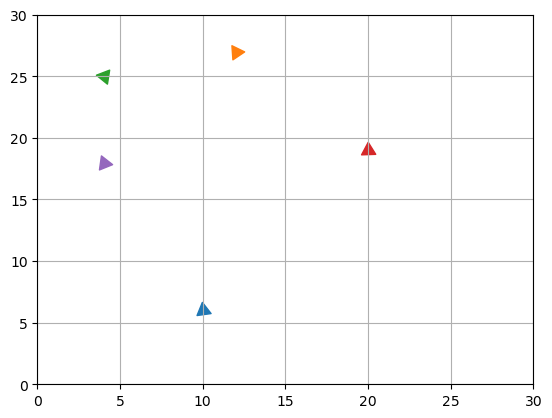

In [29]:
fig, ax = plt.subplots()
#scaling follows s = 125000/x^2 where x is the width of the coordinate

for i in np.arange(N):
    ax.scatter(xcoords[i],ycoords[i], marker = (3,0, motangles[i]), s = 125000/poolsize**2)

ax.set_xlim(0,poolsize)
ax.set_ylim(0,poolsize)
ax.grid()
plt.plot()


Analysis